In [36]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# 讀取資料

In [37]:
def read_files(root):
    dataset = {}
    files = list(glob.glob(os.path.join(root, "*.csv")))
    for file_path in files:
        print(f'read file:{file_path}')
        code = file_path.replace('stock_data\\','').replace('.csv','')
        df = pd.read_csv(file_path)
        dataset[code] = df
    
    return dataset

In [26]:
ds = read_files('stock_data')

read file:stock_data\0056.csv
read file:stock_data\1101.csv
read file:stock_data\2327.csv
read file:stock_data\2352.csv
read file:stock_data\2385.csv
read file:stock_data\2449.csv
read file:stock_data\2915.csv
read file:stock_data\3005.csv
read file:stock_data\3532.csv
read file:stock_data\6176.csv
read file:stock_data\9945.csv


In [16]:
ds.keys()

dict_keys(['0056', '1101', '2327', '2352', '2385', '2449', '2915', '3005', '3532', '6176', '9945'])

In [100]:
len(ds.values())

11

### 觀察0056.csv裡面有157筆空值，是我們要預測的

In [35]:
ds['0056'].isna().sum()

date              0
0056_close_y    157
dtype: int64

### 觀察0056.csv的前5筆資料

In [52]:
ds['0056'].head()

,date,0056_close_y
0,7691,343.558155
1,7330,334.585982
2,6825,308.877787
3,6978,311.482266
4,8041,NaN


### 觀察1101.csv的前5筆資料

In [53]:
ds['1101'].head()

,date,1101_Turnover,1101_Volume,1101_close,1101_eps,1101_high,1101_low,1101_open,1101_ups_and_downs,1101_ups_percent
0,6980,349769.0,9158.0,38.20,22.3400,38.40,37.95,38.15,0.20,0.53
1,7369,604662.0,15952.0,38.20,21.3400,38.40,37.25,37.25,0.85,2.28
2,7813,634441.0,13840.0,46.05,11.0167,46.05,45.60,46.00,0.10,0.22
3,7201,151159.0,4497.0,33.55,17.3800,33.75,33.50,33.65,-0.25,-0.74
4,7692,551092.0,14385.0,NaN,10.5495,38.45,38.15,38.20,0.20,0.52


### 觀察1101.csv裡面的缺失值情形

In [97]:
ds['1101'].isna().sum()

date                   0
1101_Turnover          8
1101_Volume           13
1101_close            11
1101_eps              16
1101_high             14
1101_low               7
1101_open             10
1101_ups_and_downs     9
1101_ups_percent      10
dtype: int64

# 把全部的資料集都合併在一起
    merge dataframes by date

In [89]:
def merge_ds(datasets):
    result = pd.DataFrame()
    for dt in datasets.values():
        if result.empty:
            result = dt
        else:
            result = pd.merge(result, dt, on='date')
    
    return result

### 合併後的資料集(mds) 大小 (852, 92)

In [91]:
mds = merge_ds(ds)
mds.shape

(852, 92)

In [92]:
mds.head()

,date,0056_close_y,1101_Turnover,1101_Volume,1101_close,1101_eps,1101_high,1101_low,1101_open,1101_ups_and_downs,...,6176_ups_percent,9945_Turnover,9945_Volume,9945_close,9945_eps,9945_high,9945_low,9945_open,9945_ups_and_downs,9945_ups_percent
0,7691,343.558155,660458.0,17253.0,38.2,10.4945,38.50,38.20,38.25,-0.25,...,-0.22,55429.0,1139.0,48.70,3.0324,48.75,48.55,48.55,0.25,0.52
1,7330,334.585982,224111.0,6095.0,36.9,20.1600,37.00,36.50,36.50,-0.10,...,-1.45,97527.0,3014.0,32.40,7.3100,32.55,31.90,32.10,-0.10,-0.31
2,6825,308.877787,322056.0,9133.0,35.0,26.1200,36.05,35.00,36.05,-1.05,...,-1.17,101583.0,2744.0,36.95,6.6600,37.50,36.80,37.25,-0.30,-0.81
3,6978,311.482266,265164.0,6959.0,38.2,22.3400,38.40,37.55,37.70,0.40,...,0.33,55584.0,1425.0,38.95,8.3900,39.15,38.80,38.95,0.00,0.00
4,8041,NaN,656944.0,15381.0,42.6,10.4926,42.90,42.50,42.50,0.20,...,0.97,36133.0,853.0,42.30,3.8986,42.50,42.20,NaN,0.30,0.71


In [96]:
mds.isna().sum()

date                    0
0056_close_y          157
1101_Turnover           8
1101_Volume            13
1101_close             11
                     ... 
9945_high              16
9945_low               22
9945_open              22
9945_ups_and_downs     13
9945_ups_percent       22
Length: 92, dtype: int64

### 把資料分成訓練部分(train_set) 和考試最終要預測的部分(test_set)

In [112]:
train_set = mds[~mds['0056_close_y'].isna()]
test_set = mds[mds['0056_close_y'].isna()]

In [118]:
train_set.sort_values(by=['date'], axis=0, inplace=True)

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### 把訓練部分(train_set) 所有缺失值丟掉 (剩下529 rows)

In [120]:
dts = train_set.dropna()

In [150]:
dts

,date,0056_close_y,1101_Turnover,1101_Volume,1101_close,1101_eps,1101_high,1101_low,1101_open,1101_ups_and_downs,...,6176_ups_percent,9945_Turnover,9945_Volume,9945_close,9945_eps,9945_high,9945_low,9945_open,9945_ups_and_downs,9945_ups_percent
605,6815,319.623136,93134.0,2589.0,35.75,26.6800,36.20,35.75,35.80,0.10,...,1.77,146528.0,3785.0,38.80,6.9900,39.00,38.20,38.25,0.65,1.70
569,6817,320.416337,147950.0,4092.0,36.40,27.1600,36.40,35.60,35.60,0.45,...,-0.58,240982.0,6526.0,37.25,6.7100,37.30,36.70,36.80,-0.45,-1.19
198,6818,319.358946,95754.0,2627.0,36.60,27.3100,36.65,36.05,36.40,0.20,...,-1.94,94300.0,2540.0,37.05,6.6800,37.50,37.00,37.35,-0.20,-0.54
531,6819,314.621555,145875.0,3990.0,36.65,27.3500,36.70,36.35,36.60,0.05,...,-2.96,105420.0,2829.0,37.40,6.7400,37.45,37.00,37.05,0.35,0.94
543,6823,316.985982,139724.0,3855.0,36.05,26.9000,36.85,35.80,36.85,-0.60,...,-6.31,116971.0,3145.0,37.15,6.6900,37.70,36.85,37.65,-0.25,-0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,7840,384.052701,802204.0,18027.0,44.30,10.5981,44.80,44.30,44.80,-0.50,...,-0.81,40804.0,985.0,41.75,4.4180,41.75,41.10,41.15,0.70,1.71
668,7841,383.186772,474603.0,10694.0,44.65,10.6818,44.65,44.15,44.20,0.35,...,0.00,46111.0,1103.0,41.90,4.4339,42.10,41.50,41.80,0.15,0.36
617,7844,380.882266,610673.0,13588.0,44.85,10.7297,45.10,44.75,44.85,0.20,...,2.46,31829.0,760.0,42.00,4.4444,42.05,41.75,41.90,0.10,0.24
521,7845,378.297760,405662.0,9051.0,44.80,10.7177,44.95,44.60,44.95,-0.05,...,-0.80,47432.0,1136.0,41.50,4.3915,42.10,41.45,42.00,-0.50,-1.19


### 把訓練部分 (train_set) 分成訓練集和測試集，等一下要跑模型用

In [143]:
from sklearn.model_selection import train_test_split

In [155]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [152]:
X = dts.drop('0056_close_y', axis = 1)
Y = dts['0056_close_y']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 91)
(175, 91)
(354,)
(175,)


### 線性回歸模型

Text(0.5, 1.0, 'mse of lm = 200.2446931435705, r2=0.79935807618298')

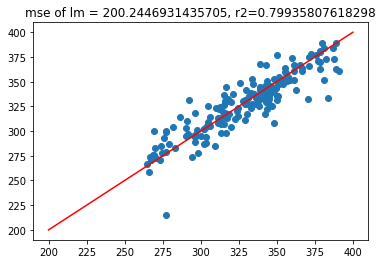

In [233]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
reg1 = model1.fit(X_train, Y_train)
pred1 = model1.predict(X_test)

plt.scatter(Y_test, pred1)
plt.plot([200, 400], [200, 400], 'r')
plt.title(f'mse of lm = {mean_squared_error(Y_test, pred1)}, r2={r2_score(Y_test, pred1)}')

### 決策樹模型

In [157]:
from sklearn.tree import DecisionTreeRegressor

Text(0.5, 1.0, 'mse of decision tree = 103.21464130668373, r2=0.8965806090900561')

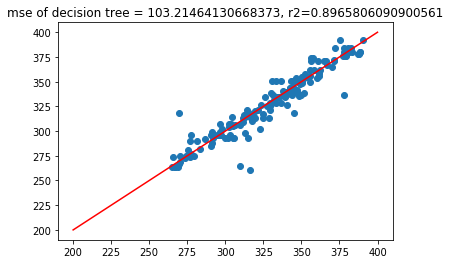

In [175]:
model3 = DecisionTreeRegressor(max_depth=10)
model3.fit(X_train, Y_train)
pred3 = model3.predict(X_test)

plt.scatter(Y_test, pred3)
plt.plot([200, 400], [200, 400], 'r')
plt.title(f'mse of decision tree = {mean_squared_error(Y_test, pred3)}, r2={r2_score(Y_test, pred3)}')

### SVM模型

In [177]:
from sklearn.svm import SVR

Text(0.5, 1.0, 'mse of svm = 632.7356905004515, r2=0.3660091350402044')

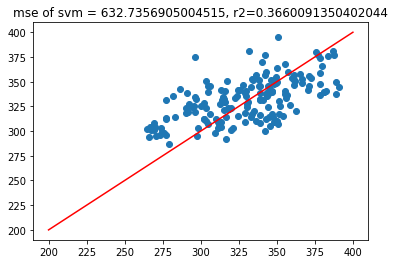

In [183]:
model4 = SVR(kernel='rbf', C=100)
model4.fit(X_train, Y_train)
pred4 = model4.predict(X_test)

plt.scatter(Y_test, pred4)
plt.plot([200, 400], [200, 400], 'r')
plt.title(f'mse of svm = {mean_squared_error(Y_test, pred4)}, r2={r2_score(Y_test, pred4)}')

### 隨機森林模型

In [184]:
from sklearn.ensemble import RandomForestRegressor

Text(0.5, 1.0, 'mse of random forest = 59.62139070475869, r2=0.940260336771711')

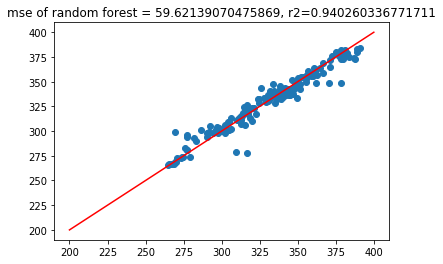

In [186]:
model5 = RandomForestRegressor(n_estimators=100)
model5.fit(X_train, Y_train)
pred5 = model5.predict(X_test)

plt.scatter(Y_test, pred5)
plt.plot([200, 400], [200, 400], 'r')
plt.title(f'mse of random forest = {mean_squared_error(Y_test, pred5)}, r2={r2_score(Y_test, pred5)}')

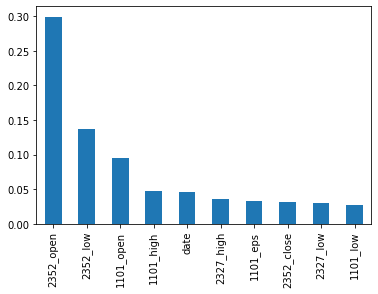

In [187]:
feat_importances = pd.Series(model5.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='bar')

### 梯度提升模型

In [188]:
from sklearn.ensemble import GradientBoostingRegressor

Text(0.5, 1.0, 'mse of gradient boosting = 59.96508232691182, r2=0.9399159633594321')

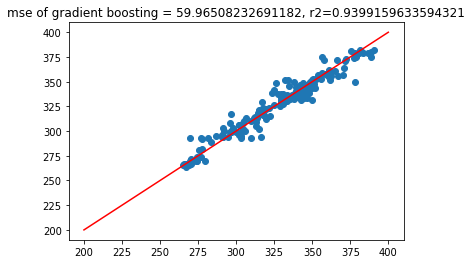

In [234]:
model6 = GradientBoostingRegressor(n_estimators=100)
model6.fit(X_train, Y_train)
pred6 = model6.predict(X_test)

plt.scatter(Y_test, pred6)
plt.plot([200, 400], [200, 400], 'r')
plt.title(f'mse of gradient boosting = {mean_squared_error(Y_test, pred6)}, r2={r2_score(Y_test, pred6)}')

### 把test_set裡面的0056_close_y丟掉，因為本來就是空的，等一下要用F_test來考試

In [232]:
F_test = test_set.drop('0056_close_y', axis = 1)

### 因為梯度提升模型看起來效果不錯，所以用此模型來考試
    因為F_test裡面有缺失值，會沒辦法考試，所以暫時先用平均值補起來 
    F_pred就是我們的預測結果

In [229]:
F_pred = model6.predict(F_test.fillna(np.mean(F_test)))

### 把預測結果輸出成 result.csv，並上傳到 kaggle

In [230]:
F_pred = pd.DataFrame(F_pred)
F_pred.columns = ["prediction"]
F_pred.index = F_test.index
output=pd.DataFrame(data={"date":F_test["date"],"0056_close_y":F_pred["prediction"]})
output.to_csv(path_or_buf="results.csv",index=False,quoting=3,sep=',')

### 觀察 result.csv的結果

In [231]:
output

,date,0056_close_y
4,8041,368.244734
12,7852,343.837282
17,8051,370.062312
20,8014,372.781999
23,8075,333.373230
...,...,...
823,8082,304.903094
829,7896,348.378870
837,7965,369.920674
841,7876,340.308916
